In [15]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df_districts = gpd.read_file('data/City_Council_Districts_-_Effective_for_the_2023_Municipal_Election.geojson')

<AxesSubplot:>

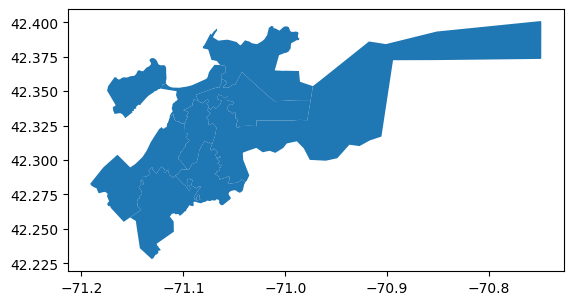

In [17]:
# df_places['geometry']
df_districts['geometry'].plot()

In [18]:
df_tracts = gpd.read_file('data/cb_2021_25_tract_500k.geojson')
df_tracts = df_tracts.rename({'NAME': 'tract'}, axis=1)
df_tracts = df_tracts.query('NAMELSADCO == "Suffolk County"')
df_tracts = df_tracts[['tract', 'geometry']]

In [19]:
df_tracts

,tract,geometry
1190,1.01,"POLYGON Z ((-71.13660 42.36016 0.00000, -71.13..."
1191,1.02,"POLYGON Z ((-71.16090 42.35863 0.00000, -71.15..."
1192,2.01,"POLYGON Z ((-71.16764 42.35379 0.00000, -71.16..."
1193,2.02,"POLYGON Z ((-71.16057 42.35267 0.00000, -71.16..."
1194,3.01,"POLYGON Z ((-71.17394 42.35340 0.00000, -71.17..."
...,...,...
1420,9816,"POLYGON Z ((-70.99939 42.38833 0.00000, -71.00..."
1421,9817,"POLYGON Z ((-71.07256 42.35544 0.00000, -71.07..."
1422,9818,"POLYGON Z ((-71.12572 42.31843 0.00000, -71.12..."
1423,9819,"POLYGON Z ((-71.18531 42.27950 0.00000, -71.18..."


<AxesSubplot:>

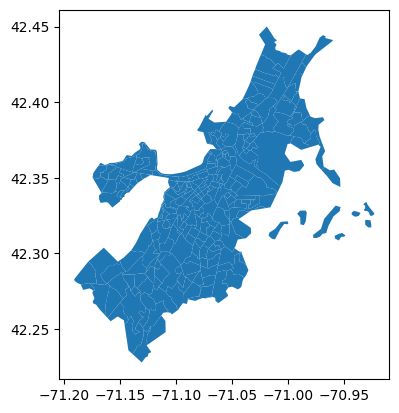

In [20]:
df_tracts['geometry'].plot()


In [178]:
df = pd.read_csv(
    'data/ACSDP5Y2021.DP03_2023-04-16T204655/ACSDP5Y2021.DP03-Data.csv')

df1 = pd.read_csv('data/ACSDT5Y2021.B02001-2023-04-18T220527.csv')
df.dropna(inplace=True, axis='columns')
df1.dropna(inplace=True, axis='columns')
df1_t = df1.set_index('Label (Grouping)', drop=False).transpose()
df1_t.reset_index(inplace=True)
df1_t.head()
#df1.head()

Label (Grouping),index,Total:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races:,Two races including Some other race,"Two races excluding Some other race, and three or more races"
0,Label (Grouping),Total:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander...,Some other race alone,Two or more races:,Two races including Some other race,"Two races excluding Some other race, a..."
1,"Census Tract 1.01, Suffolk County, Massachuset...","1,824","1,348",105,0,320,0,22,29,7,22
2,"Census Tract 1.01, Suffolk County, Massachuset...",±331,±326,±90,±13,±151,±13,±25,±28,±11,±26
3,"Census Tract 1.02, Suffolk County, Massachuset...","3,706","2,109",423,0,735,0,403,36,0,36
4,"Census Tract 1.02, Suffolk County, Massachuset...",±750,±788,±240,±13,±267,±13,±306,±44,±13,±44


In [199]:
import re

df['tract'] = (df['NAME']
    .map(lambda x: re.search(r'[^\d]*(\d+\.\d+|\d+)', x))
    .map(lambda x: x.group(1) if x != None else ''))

df1_t['tract'] = (df1_t['index']
    .map(lambda x: re.search(r'[^\d]*(\d+\.\d+|\d+)', x))
    .map(lambda x: x.group(1) if x != None else ''))

df1_new = df1_t.iloc[1::2]
df1_new.head()

Label (Grouping),index,Total:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races:,Two races including Some other race,"Two races excluding Some other race, and three or more races",tract
1,"Census Tract 1.01, Suffolk County, Massachuset...","1,824","1,348",105,0,320,0,22,29,7,22,1.01
3,"Census Tract 1.02, Suffolk County, Massachuset...","3,706","2,109",423,0,735,0,403,36,0,36,1.02
5,"Census Tract 2.01, Suffolk County, Massachuset...","4,309","2,914",301,0,243,0,418,433,52,381,2.01
7,"Census Tract 2.02, Suffolk County, Massachuset...","4,094","2,479",316,0,406,0,404,489,285,204,2.02
9,"Census Tract 3.01, Suffolk County, Massachuset...","2,827","2,026",209,0,328,0,123,141,72,69,3.01


In [213]:
white = df1_new.iloc[: , [2, -1]].copy() 
white.head()

Label (Grouping),White alone,tract
1,"1,348",1.01
3,"2,109",1.02
5,"2,914",2.01
7,"2,479",2.02
9,"2,026",3.01


In [24]:
df_tracts

,tract,geometry
1190,1.01,"POLYGON Z ((-71.13660 42.36016 0.00000, -71.13..."
1191,1.02,"POLYGON Z ((-71.16090 42.35863 0.00000, -71.15..."
1192,2.01,"POLYGON Z ((-71.16764 42.35379 0.00000, -71.16..."
1193,2.02,"POLYGON Z ((-71.16057 42.35267 0.00000, -71.16..."
1194,3.01,"POLYGON Z ((-71.17394 42.35340 0.00000, -71.17..."
...,...,...
1420,9816,"POLYGON Z ((-70.99939 42.38833 0.00000, -71.00..."
1421,9817,"POLYGON Z ((-71.07256 42.35544 0.00000, -71.07..."
1422,9818,"POLYGON Z ((-71.12572 42.31843 0.00000, -71.12..."
1423,9819,"POLYGON Z ((-71.18531 42.27950 0.00000, -71.18..."


In [227]:
df_analysis = df[['tract', 'DP03_0128PE']].merge(df_tracts, left_on='tract', right_on='tract')
df1_analysis = white.merge(df_tracts, left_on='tract', right_on='tract')
df1_analysis

,White alone,tract,geometry
0,"1,348",1.01,"POLYGON Z ((-71.13660 42.36016 0.00000, -71.13..."
1,"2,109",1.02,"POLYGON Z ((-71.16090 42.35863 0.00000, -71.15..."
2,"2,914",2.01,"POLYGON Z ((-71.16764 42.35379 0.00000, -71.16..."
3,"2,479",2.02,"POLYGON Z ((-71.16057 42.35267 0.00000, -71.16..."
4,"2,026",3.01,"POLYGON Z ((-71.17394 42.35340 0.00000, -71.17..."
...,...,...,...
230,0,9816,"POLYGON Z ((-70.99939 42.38833 0.00000, -71.00..."
231,0,9817,"POLYGON Z ((-71.07256 42.35544 0.00000, -71.07..."
232,10,9818,"POLYGON Z ((-71.12572 42.31843 0.00000, -71.12..."
233,0,9819,"POLYGON Z ((-71.18531 42.27950 0.00000, -71.18..."


/home/sana/.local/lib/python3.8/site-packages/geopandas/plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


<AxesSubplot:>

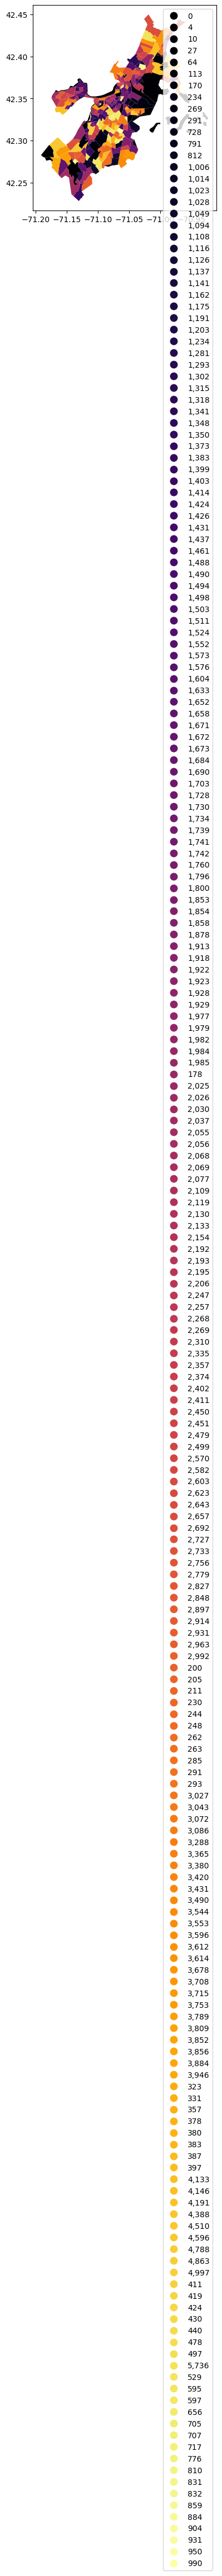

In [233]:
df1_analysis = gpd.GeoDataFrame(df1_analysis)
# df_analysis.dropna(subset=['DP03_0128PE'], axis=0)
# df_analysis.fillna(0.0)

df1_analysis[1] = pd.to_numeric(
    df1_analysis[df1_analysis.columns[0]], errors='coerce')

df1_analysis.dropna()

# df_analysis['geometry'].plot()
# with plt.style.context(("seaborn", "ggplot")):
df1_analysis.plot(df1_analysis[df1_analysis.columns[0]], legend=True, colormap='inferno')

# df_analysis.to_file('data/test.geojson')

/home/sana/.local/lib/python3.8/site-packages/geopandas/plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


<AxesSubplot:>

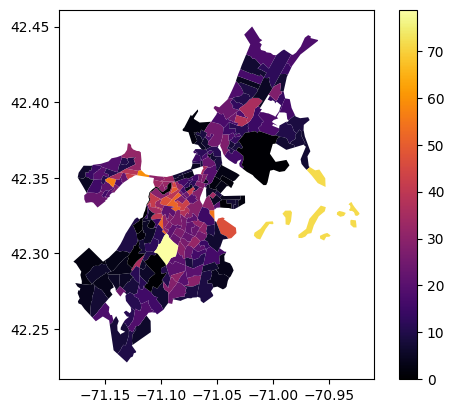

In [231]:
df_analysis = gpd.GeoDataFrame(df_analysis)
# df_analysis.dropna(subset=['DP03_0128PE'], axis=0)
# df_analysis.fillna(0.0)

df_analysis['DP03_0128PE'] = pd.to_numeric(
    df_analysis['DP03_0128PE'], errors='coerce')

df_analysis.dropna()

# df_analysis['geometry'].plot()
# with plt.style.context(("seaborn", "ggplot")):
df_analysis.plot("DP03_0128PE", legend=True, colormap='inferno')

# df_analysis.to_file('data/test.geojson')

<AxesSubplot: >

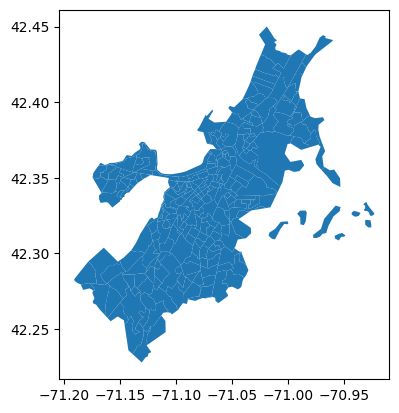

In [ ]:
df_tracts['geometry'].plot()